## Project: Titanic - Machine Learning from Disaster

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv('train.csv', index_col = 'PassengerId')
test_df = pd.read_csv('test.csv', index_col = 'PassengerId')

In [5]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

#### Notes:
* SibSp: # of siblings/ spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* fare: Passenger fare
* cabin: Cabin number

In [7]:
#preview data
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Data Classification: Categorical vs Numerical
* This helps us select  the appropriate plots for visualization

#### Which features are categorical?
+ Categorical  Features: 'nominal', 'ordinam', 'ratio', 'interval'
+ To classify the samples into sets of simiar samples

#### Which features are numerical?
+ Numerical features: 'discrete', 'continuous' or 'timeseries'
+ These values change from sample to sample

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp , Parch
* Numerical: (continuous) Age, Fare, (discrete)
* Mix types of data: Ticket, Cabin
* Contain Error/Typo: Name
* Blank or Null: Cabin > Age > Embarked
* Various Data Type: String, Int, Float

In [10]:
#phải đổi kiểu dữ liệu nếu không thì quá trình train sẽ gặp lỗi
# vì survived chỉ có 2 giá trị 1=live, 0=die.
train_df["Survived"]  = train_df["Survived"].astype("category")

In [11]:
features = ["Pclass",'Sex', 'SibSp', "Parch", 'Embarked']
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df, features)
convert_cat(test_df, features)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Distribution of Numerical feature values across the samples

In [13]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Distribution of Categorical feature values across the samples

In [14]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 3. Exploratory Data Analysis (EDA)

#### Correlating categorical features
* Categorical: Survived, Sex, Embarked, Pclass (ordinal)

#### Target Variable: Survived

In [17]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Only 385 survived the diaster. So the training data suffers from data imbalance it is not servers which is why I will not consider technique like sampling to tackle the imbalance

### Sex

In [18]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


<AxesSubplot:xlabel='Sex', ylabel='count'>

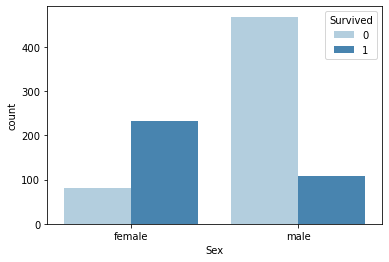

In [21]:
sns.countplot(data=train_df, x='Sex', hue='Survived', palette = 'Blues')

* Remaining Categorical Feature Columns

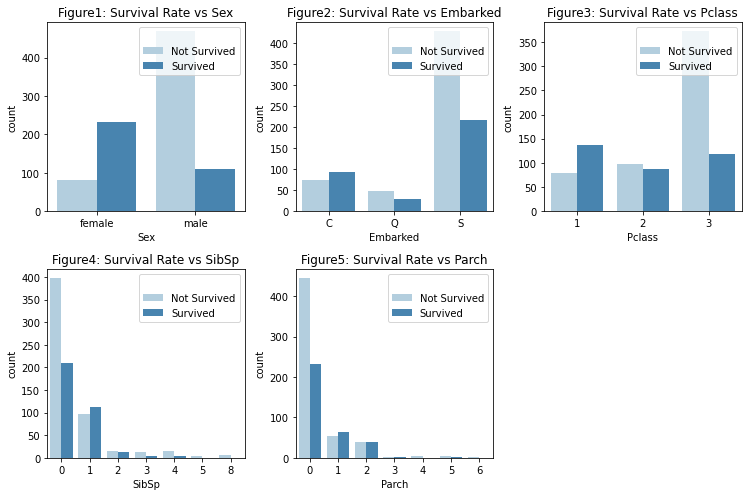

In [29]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3

fig, ax=plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c #index to loop through list 'cols'
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue='Survived', palette='Blues', ax=ax_i)
            ax_i.set_title(f'Figure{i+1}: Survival Rate vs {cols[i]}')
            ax_i.legend(title=' ', loc='upper right', labels=['Not Survived', 'Survived'])

            
ax.flat[-1].set_visible(False)            
plt.tight_layout()            

### Observation:

 #### * Survival Rate:
             * Fig 1: Female survial rate > male
             * Fig 2: Most people embarked on Southampton, and also had the highest people not survived
             * Fig 3: 1st class higher survival rate
             * Fig 4: Prople going with 0 SibSp are mostly not survived. The number of passenger with 1-2 family members has a better chance of survival
             * Fig 5: Prople going with 0 Parch are mostly not survived
             
             
## 3.2 EDA for Numerical Features
    * Numerical Features: (continuous) Age, Pare
    
    
    
  ### Age

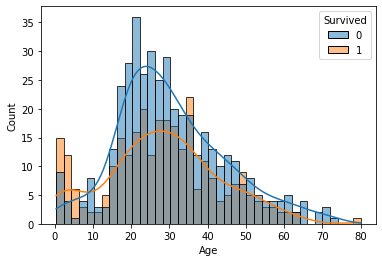

In [31]:
sns.histplot(data=train_df, x='Age',hue ='Survived', bins=40, kde=True);

* Majority passengers were from 18-40 ages
* Children had more chance to survive than other ages


### Fare

In [32]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

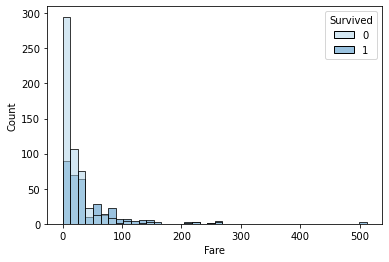

In [34]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=40, palette='Blues')

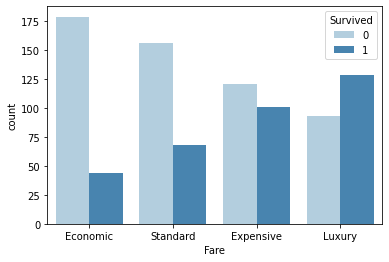

In [38]:
# To name for 0-25% quartile, 25-50, 50-75,75-100
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df["Survived"], palette = 'Blues');

* Distribution of Fare
    * Fare does not follow a normal distribution and has a huge spike at the price range (0-100).
    * The distribution is skewed to the left with '0.75' of the fare paid under 31 and a max paid fare of 512.
* Quartile plot:
    * Passenger with Luxury & Expensive Fare will have more chance to survive